In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

#### Regression linéaire

In [123]:

# Parameters (y = a*x + b)
a=0.6
b=2

Créons le jeu de données pour l'apprentissage. x_data est composé de 100000 points, et un bruit normal est ajouté sur l'axe des ordonnées pour haque point :

In [124]:
# Create noisy data
x_data = np.linspace(-10, 10, num=100000)
y_data = a * x_data + b + np.random.normal(size=100000)

Le modèle Sequential est une pile linéaire de couches (un réseau classique). Keras est le coeur permettant de construire des réseaux de neurones. Nous ajoutons une couche complétement connectée à notre modèle (Dense) avec :

    une unité ou un neurone (units = 1)
    la fonction de transfert est ninéaire (activation = 'linear')
    le réseau n'a qu'une entrée (input_shape=[1])

Le modèle est compilé avec les paramètre d'optimisation suivants:

    L'algorithme d'optimisation est Adam (optimizer="adam"), plus d'info sur cette page
    Loss est la perte ou l'erreur calculée sur la base des moindres carrés (loss='mse'). Plus d'informations sur les metriques ici

Une fois le modèle créé, entraînons notre réseau :

    x_data est l'entrée
    y_data est la sortie désirée
    epochs=5 signifie que notre réseaux sera entrainé 5 fois sur notre jeu de données
    verbose=1 affiche la progression dans la console
.dense (tous les noeuds sont connectés)

In [125]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.compile(loss='mse', optimizer="adam")


In [126]:
model

In [127]:
# Display the model (only 2 parameters to optimize)
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [128]:
# Learn
model.fit( x_data, y_data, epochs=5, verbose=1 )


Epoch 1/5
3125/3125 [==============================] - 11s 3ms/step - loss: 6.4028
Epoch 2/5
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9931
Epoch 3/5
3125/3125 [==============================] - 11s 3ms/step - loss: 0.9933
Epoch 4/5
3125/3125 [==============================] - 11s 3ms/step - loss: 0.9867
Epoch 5/5
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9949


In [129]:
# Predict (compute) the output 
y_predicted = model.predict(x_data)


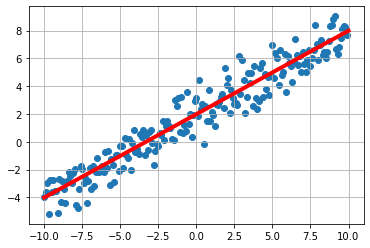

In [130]:
# Display the result
plt.scatter(x_data[::500], y_data[::500])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

 Les valeurs des poids du réseau :

In [131]:
print( model.trainable_variables )

[<tf.Variable 'dense_55/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.60046846]], dtype=float32)>, <tf.Variable 'dense_55/bias:0' shape=(1,) dtype=float32, numpy=array([1.9849322], dtype=float32)>]


Nos poids sont 0.5970049 et 1.9903255, presque 0.6 et 2, nos paramètres initiaux !

In [133]:
# TensorFlow and tf.keras
import tensorflow as tf
print(tf.__version__)


2.4.1


#### Régression non linéaire avec un réseau de neurones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import math

In [134]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')


Data created successfully


Le modèle est compilé avec les paramètre d'optimisation suivants:

    L'algorithme d'optimisation est Adam (optimizer="adam"), plus d'info sur cette page
    Loss est la perte ou l'erreur calculée sur la base des moindres carrés (loss='mse'). Plus d'informations sur les metriques ici

Une fois le modèle créé, entraînons notre réseau :

    x_data est l'entrée
    y_data est la sortie désirée
    epochs=5 signifie que notre réseaux sera entrainé 5 fois sur notre jeu de données
    verbose=1 affiche la progression dans la console


In [135]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")


In [136]:
# Display the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_58 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Training
fit4_64=model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.4352
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1904
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2034
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1960
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1924
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1944
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1952
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2024
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1947
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1833
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1864
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2004
Epoch 13/100
32/32 [=================

In [138]:
# Compute the output 
y_predicted = model.predict(x_data)


In [139]:
mse = tf.keras.losses.MeanSquaredError()
mse(y_data, y_predicted).numpy()

0.3914548

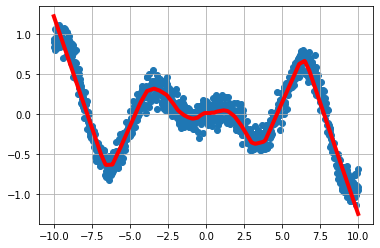

In [140]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

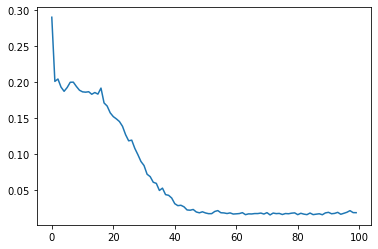

In [142]:
plt.plot(fit4_64.history['loss'])

In [143]:
# Create model1 with 3 layers and 64 units

model1 = keras.Sequential()
model1.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model1.add(keras.layers.Dense(units = 64, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model1.add(keras.layers.Dense(units = 1, activation = 'linear'))
model1.compile(loss='mse', optimizer="adam")


In [144]:
# Display the model
model1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [145]:
# Training
fit3_64 = model1.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.2789
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2089
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2033
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1954
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1909
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1894
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1779
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1933
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1871
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1878
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1929
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1776
Epoch 13/100
32/32 [=================

In [146]:
# Compute the output 
y_predicted1 = model1.predict(x_data)

In [147]:
mse(y_data, y_predicted1).numpy()

0.30629307

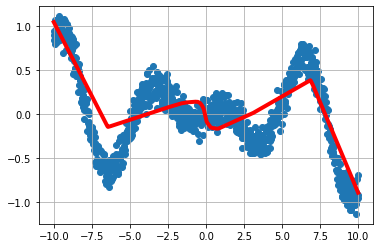

In [148]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted1, 'r', linewidth=4)
plt.grid()
plt.show()



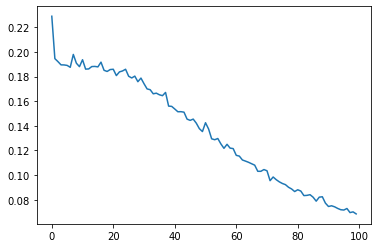

In [149]:
plt.plot(fit3_64.history['loss'])

In [150]:
# Create model1 with 3 layers and 1OO units
model2 = keras.Sequential()
model2.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model2.add(keras.layers.Dense(units = 100, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model2.add(keras.layers.Dense(units = 1, activation = 'linear'))
model2.compile(loss='mse', optimizer="adam")


In [151]:
# Display the model
model2.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_67 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 101       
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Training
fit3_100 = model2.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 1.2846
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2229
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1993
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1899
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1808
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1974
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1828
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1751
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1884
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1834
Epoch 11/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1888
Epoch 12/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1797
Epoch 13/100
32/32 [=================

In [153]:
# Compute the output 
y_predicted2 = model2.predict(x_data)

In [154]:
mse(y_data, y_predicted2).numpy()

0.297819

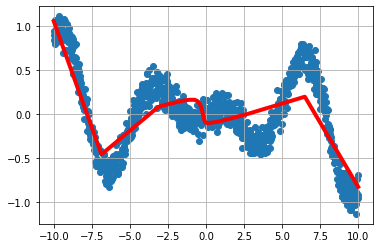

In [155]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted2, 'r', linewidth=4)
plt.grid()
plt.show()


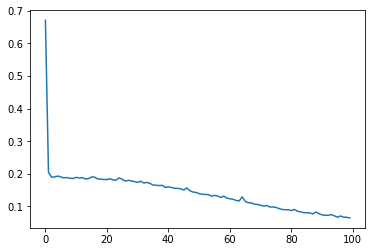

In [156]:
plt.plot(fit3_100.history['loss'])

In [157]:
# Create model3 with 3 layers and 128 units

model3 = keras.Sequential()
model3.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model3.add(keras.layers.Dense(units = 128, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model3.add(keras.layers.Dense(units = 1, activation = 'linear'))
model3.compile(loss='mse', optimizer="adam")

# Display the model
model3.summary()

# Training
fit3_128 = model3.fit( x_data, y_data, epochs=100, verbose=1)

# Compute the output 
y_predicted3 = model3.predict(x_data)




Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 129       
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.6816
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2033
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1975
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1830
Epoch 5/100
32/32 [==============================] - 0s 5ms/step 

In [158]:
mse(y_data, y_predicted3).numpy()

0.353173

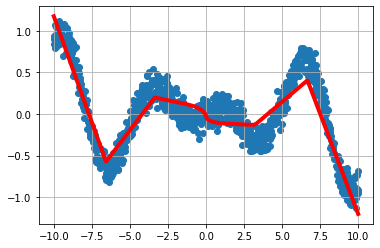

In [159]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted3, 'r', linewidth=4)
plt.grid()
plt.show()



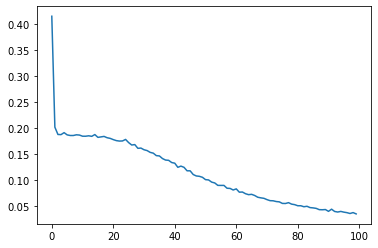

In [160]:
plt.plot(fit3_128.history['loss'])

In [161]:
# Create model4 with 3 layers and 150 units

model4 = keras.Sequential()
model4.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model4.add(keras.layers.Dense(units = 150, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model4.add(keras.layers.Dense(units = 1, activation = 'linear'))
model4.compile(loss='mse', optimizer="adam")

# Display the model
model4.summary()

# Training
fit3_150= model4.fit( x_data, y_data, epochs=100, verbose=1)

# Compute the output 
y_predicted4 = model4.predict(x_data)





Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_73 (Dense)             (None, 150)               300       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 151       
Total params: 453
Trainable params: 453
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.8855
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2098
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1940
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1815
Epoch 5/100
32/32 [==============================] - 0s 5ms/step 

In [162]:
mse(y_data, y_predicted4).numpy()

0.35383955

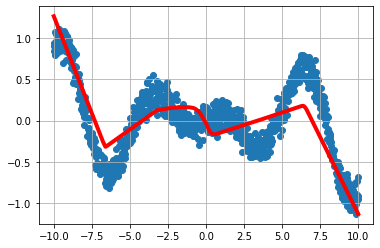

In [163]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted4, 'r', linewidth=4)
plt.grid()
plt.show()


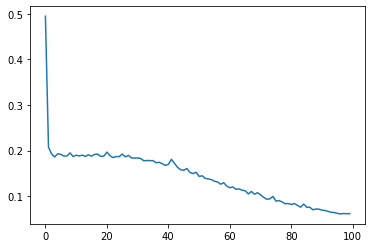

In [164]:
plt.plot(fit3_150.history['loss'])

In [165]:
# Create model5 with 3 layers and 200 units

model5 = keras.Sequential()
model5.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model5.add(keras.layers.Dense(units = 200, activation = 'relu'))
#model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model5.add(keras.layers.Dense(units = 1, activation = 'linear'))
model5.compile(loss='mse', optimizer="adam")

# Display the model
model5.summary()

# Training
fit3_200 = model5.fit( x_data, y_data, epochs=100, verbose=1)

# Compute the output 
y_predicted5 = model5.predict(x_data)





Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_76 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 201       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.2973
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1988
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1943
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1991
Epoch 5/100
32/32 [==============================] - 0s 10ms/ste

In [166]:
mse(y_data, y_predicted5).numpy()

0.3700191

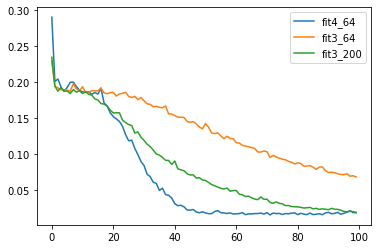

In [173]:
plt.plot(fit4_64.history['loss'], label = 'fit4_64')
plt.plot(fit3_64.history['loss'], label = 'fit3_64')
#plt.plot(fit3_100.history['loss'], label = 'fit3_100')
#plt.plot(fit3_128.history['loss'], label = 'fit3_128')
#plt.plot(fit3_150.history['loss'],label = 'fit3_150')
plt.plot(fit3_200.history['loss'], label = 'fit3_200')
plt.legend()

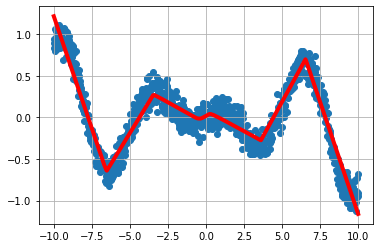

In [168]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted5, 'r', linewidth=4)
plt.grid()
plt.show()


In [174]:
# Create model6 with 4 layers and 128 units

model6 = keras.Sequential()
model6.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model6.add(keras.layers.Dense(units = 128, activation = 'relu'))
model6.add(keras.layers.Dense(units = 128, activation = 'relu'))
model6.add(keras.layers.Dense(units = 1, activation = 'linear'))
model6.compile(loss='mse', optimizer="adam")

# Display the model
model5.summary()

# Training
fit4_128 = model6.fit( x_data, y_data, epochs=100, verbose=1)

# Compute the output 
y_predicted6 = model6.predict(x_data)





Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_76 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 201       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.2589
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.1862
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2103
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2026
Epoch 5/100
32/32 [==============================] - 0s 10ms/step

Epoch 93/100
32/32 [==============================] - ETA: 0s - loss: 0.0159- ETA: 0s - loss: 0.01 - 0s 6ms/step - loss: 0.0158
Epoch 94/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 95/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 96/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0181
Epoch 97/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 98/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 99/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 100/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0151


In [175]:
mse(y_data, y_predicted6).numpy()

0.39004633

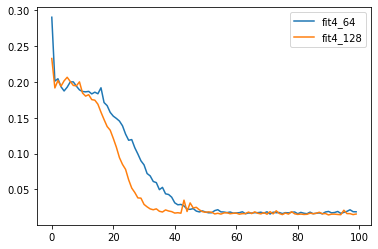

In [176]:
plt.plot(fit4_64.history['loss'], label = 'fit4_64')
plt.plot(fit4_128.history['loss'], label = 'fit4_128')
plt.legend()

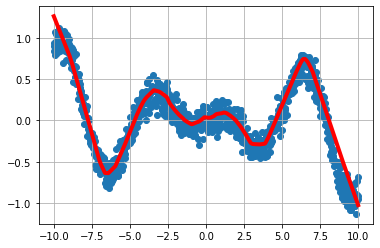

In [177]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted6, 'r', linewidth=4)
plt.grid()
plt.show()

In [180]:
# Create model7 with 5 layers and 64 units

model7 = keras.Sequential()
model7.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model7.add(keras.layers.Dense(units = 64, activation = 'relu'))
model7.add(keras.layers.Dense(units = 64, activation = 'relu'))
model7.add(keras.layers.Dense(units = 64, activation = 'relu'))
model7.add(keras.layers.Dense(units = 1, activation = 'linear'))
model7.compile(loss='mse', optimizer="adam")

# Display the model
model7.summary()

# Training
fit5_64 = model7.fit( x_data, y_data, epochs=100, verbose=1)

# Compute the output 
y_predicted7 = model7.predict(x_data)





Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_88 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_89 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_90 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 65        
Total params: 8,515
Trainable params: 8,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.1981
Epoch 2/100
32/32 [==================

In [181]:
mse(y_data, y_predicted7).numpy()

0.3799376

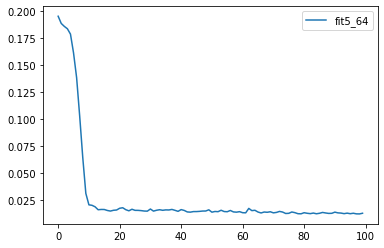

In [182]:
plt.plot(fit5_64.history['loss'], label = 'fit5_64')
plt.legend()

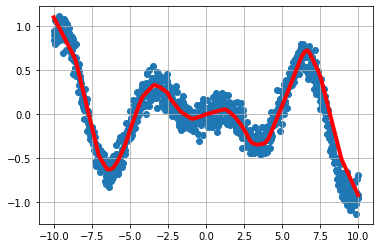

In [183]:
# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted7, 'r', linewidth=4)
plt.grid()
plt.show()


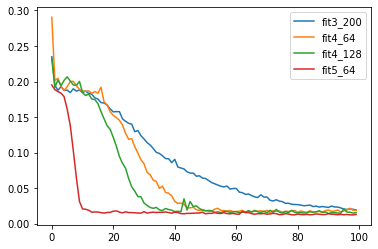

In [185]:
plt.plot(fit3_200.history['loss'], label = 'fit3_200')
plt.plot(fit4_64.history['loss'], label = 'fit4_64')
plt.plot(fit4_128.history['loss'], label = 'fit4_128')
plt.plot(fit5_64.history['loss'], label = 'fit5_64')
plt.legend()

In [213]:
# Create noisy data 3 dimensions
from mpl_toolkits.mplot3d import Axes3D


In [277]:
# Create noisy data 3 dimensions
x_data = np.linspace(-10, 10, num=1000)
y_data = np.linspace(-10, 10, num=1000)
z_data = 0.3*x_data+ 0.4*y_data + 0.1*np.random.normal(size=1000)


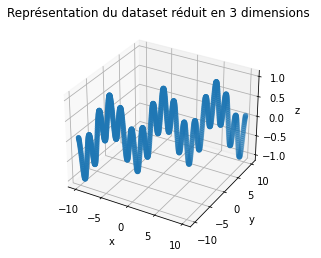

In [261]:
def draw3Dim (x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y, z, marker='o')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title("Représentation du dataset réduit en 3 dimensions ")

    plt.show()
draw3Dim(x_data, y_data, z_data)

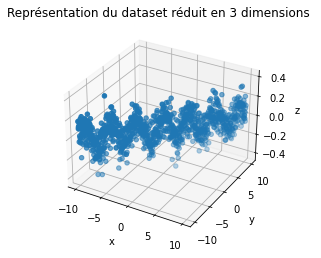

In [278]:
z_data = 0.1*np.cos(y_data+x_data) + 0.1*np.random.normal(size=1000)
draw3Dim(x_data, y_data, z_data)

Data created successfully


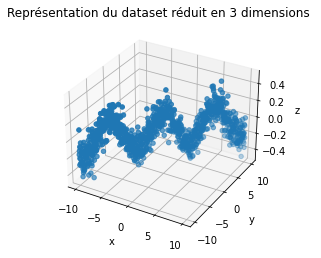

In [279]:

z_data = 0.1*np.cos(x_data) +  0.1*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')
draw3Dim(x_data, y_data, z_data)

Data created successfully


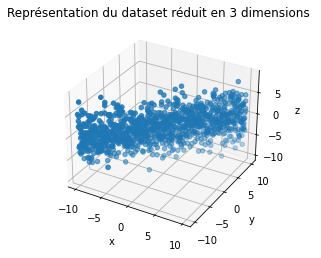

In [280]:

z_data = 0.1*np.cos(x_data) * np.cos(x_data) + 3*np.random.normal(size=1000)
print('Data created successfully')
draw3Dim(x_data, y_data, z_data)

Data created successfully


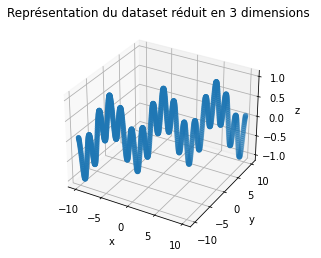

In [281]:
 #z = sin2x.cos3y 
#x_data = np.linspace(-10, 10, num=1000)
#y_data = np.linspace(-10, 10, num=1000)

z_data = np.cos(2*x_data) * np.cos(3*y_data)
print('Data created successfully')
draw3Dim(x_data, y_data, z_data)

In [248]:
xy = {'x':x_data,
     'y': y_data}


In [282]:
X= np.array((x_data,y_data)).T

In [283]:
X.shape

(1000, 2)

In [284]:
# Create model8 with 5 layers , 64 units, 1 input 

model8 = keras.Sequential()
model8.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[2]))
model8.add(keras.layers.Dense(units = 64, activation = 'relu'))
model8.add(keras.layers.Dense(units = 64, activation = 'relu'))
model8.add(keras.layers.Dense(units = 64, activation = 'relu'))
model8.add(keras.layers.Dense(units = 1, activation = 'linear'))
model8.compile(loss='mse', optimizer="adam")

# Display the model
model8.summary()

# Training
fit5_2_64 = model8.fit(X,z_data, epochs=100, verbose=1)

# Compute the output 
y_predicted8 = model8.predict(X)





Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 1)                 3         
_________________________________________________________________
dense_132 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_133 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_134 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 65        
Total params: 8,516
Trainable params: 8,516
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 12ms/step - loss: 0.7360
Epoch 2/100
32/32 [=================

32/32 [==============================] - 0s 13ms/step - loss: 0.1126
Epoch 90/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1177
Epoch 91/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1176
Epoch 92/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1303
Epoch 93/100
32/32 [==============================] - 1s 17ms/step - loss: 0.1142
Epoch 94/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1160
Epoch 95/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1124
Epoch 96/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1128
Epoch 97/100
32/32 [==============================] - 1s 18ms/step - loss: 0.1056
Epoch 98/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1224
Epoch 99/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1216
Epoch 100/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1216


In [285]:
mse(z_data, y_predicted8).numpy()

0.3865326

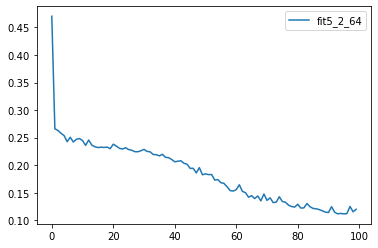

In [286]:
plt.plot(fit5_2_64.history['loss'], label = 'fit5_2_64')
plt.legend()

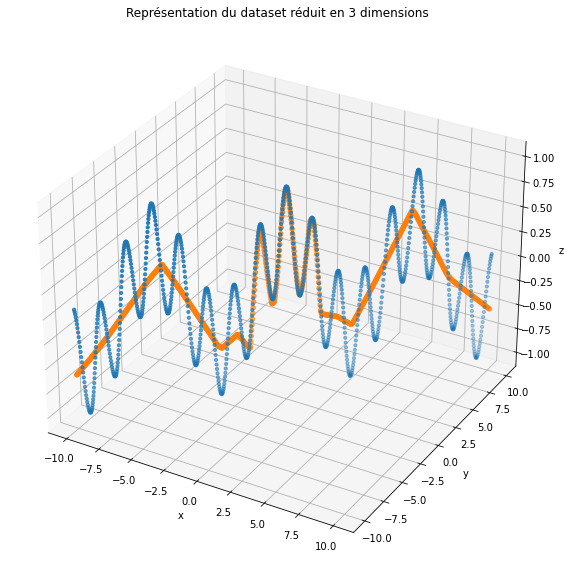

In [287]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data, y_data, z_data, marker='o', s= 10)
ax.scatter(x_data,y_data, y_predicted8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Représentation du dataset réduit en 3 dimensions ")

plt.show()

In [290]:
t= np.linspace(-10, 10, num=1000)
x_data = np.sin(t)
y_data = t**2

X= np.array((x_data,y_data)).T

#z_data = 0.1*(x_data1 + x_data2)*np.cos(x_data2) + 0.1*np.random.normal(size=1000)
z_data = (x_data**2 + y_data**2)**(1/2) + 10*np.random.normal(size=1000)

In [291]:
# Create model9 with 4 layers , 64 units, 1 input 

model9 = keras.Sequential()
model9.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[2]))
model9.add(keras.layers.Dense(units = 64, activation = 'relu'))
#model8.add(keras.layers.Dense(units = 64, activation = 'relu'))
model9.add(keras.layers.Dense(units = 64, activation = 'relu'))
model9.add(keras.layers.Dense(units = 1, activation = 'linear'))
model9.compile(loss='mse', optimizer="adam")

# Display the model
model9.summary()

# Training
fit4_1_64 = model9.fit(X,z_data, epochs=100, verbose=1)

# Compute the output 
y_predicted9 = model9.predict(X)





Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 1)                 3         
_________________________________________________________________
dense_141 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 65        
Total params: 4,356
Trainable params: 4,356
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 2504.6936
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 295.0584
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 98.1896
E

In [292]:
mse(z_data, y_predicted9).numpy()

1918.944

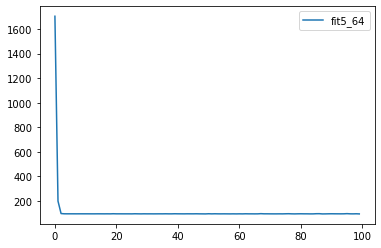

In [293]:
plt.plot(fit4_1_64.history['loss'], label = 'fit4_1_64')
plt.legend()

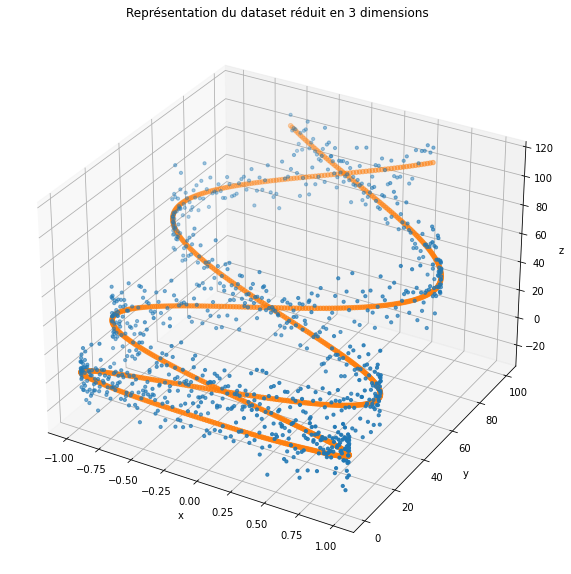

In [294]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data, y_data, z_data, marker='o', s= 10)
ax.scatter(x_data,y_data, y_predicted9)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Représentation du dataset réduit en 3 dimensions ")

plt.show()

In [ ]:

list_mse=[]
for i in range(100):
    mse=((y_predicted[i]-y_data[i])**2)/2
    list_mse.append(mse)
    

In [ ]:
t= np.linspace(-10, 10, num=1000)
x_data1 = np.sin(t)
x_data2 = t**2

x= np.array((x_data1,x_data2)).T

#z_data = 0.1*(x_data1 + x_data2)*np.cos(x_data2) + 0.1*np.random.normal(size=1000)
z_data = (x_data1**2 + x_data2**2)**(1/2) + 10*np.random.normal(size=1000)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data1, x_data2, z_data, marker='o', s= 10)
ax.scatter(x_data1,x_data2, y_predicted)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Représentation du dataset réduit en 3 dimensions ")

plt.show()

Data created successfully


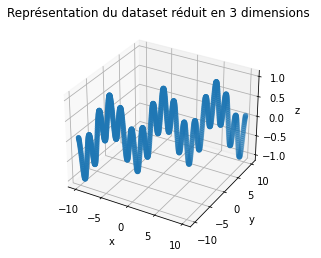

In [296]:
 #z = sin2x.cos3y 
x_data = np.linspace(-10, 10, num=1000)
y_data = np.linspace(-10, 10, num=1000)

z_data = np.cos(2*x_data) * np.cos(3*y_data)

X= np.array((x_data,y_data)).T

print('Data created successfully')
draw3Dim(x_data, y_data, z_data)

In [302]:
# Create model10 with 5 layers , 64 units, 1 input 

model10 = keras.Sequential()
model10.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=[2]))
model10.add(keras.layers.Dense(units = 64, activation = 'relu'))
model10.add(keras.layers.Dense(units = 64, activation = 'relu'))
model10.add(keras.layers.Dense(units = 64, activation = 'relu'))
model10.add(keras.layers.Dense(units = 1, activation = 'linear'))
model10.compile(loss='mse', optimizer="adam")

# Display the model
model10.summary()

# Training
fit5_2_64 = model10.fit(X,z_data, epochs=100, verbose=1)

# Compute the output 
y_predicted10 = model10.predict(X)





Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_155 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_156 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_157 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 65        
Total params: 8,583
Trainable params: 8,583
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 2s 19ms/step - loss: 0.2478
Epoch 2/100
32/32 [=================

Epoch 89/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1018
Epoch 90/100
32/32 [==============================] - 1s 18ms/step - loss: 0.0992
Epoch 91/100
32/32 [==============================] - 0s 15ms/step - loss: 0.0926
Epoch 92/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0988
Epoch 93/100
32/32 [==============================] - 1s 17ms/step - loss: 0.0959
Epoch 94/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0982
Epoch 95/100
32/32 [==============================] - 0s 11ms/step - loss: 0.0942
Epoch 96/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0981
Epoch 97/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0963
Epoch 98/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0955
Epoch 99/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0954
Epoch 100/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0951


In [303]:
mse(z_data, y_predicted10).numpy()

0.424345

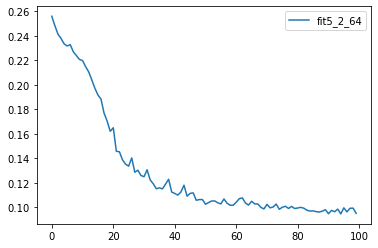

In [304]:
plt.plot(fit5_2_64.history['loss'], label = 'fit5_2_64')
plt.legend()

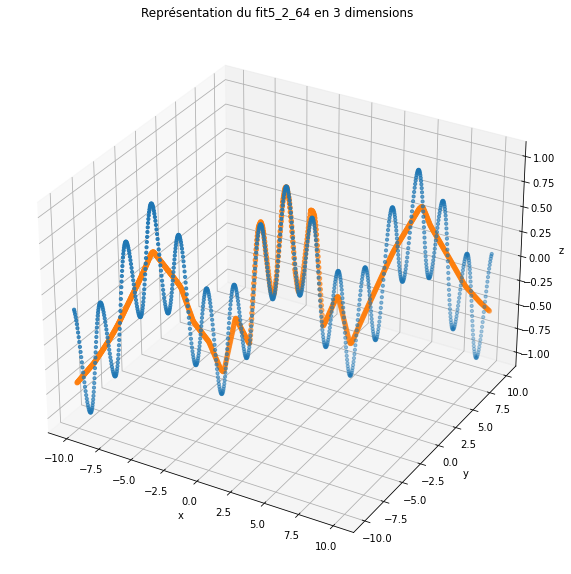

In [305]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data, y_data, z_data, marker='o', s= 10)
ax.scatter(x_data,y_data, y_predicted10)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Représentation du fit5_2_64 en 3 dimensions ")

plt.show()